# Pair-distribution function

## Real-space

A pair distribution function can be straightforwardly calculated from a neighbor list. We need to instruct the neighbor list to return the distance between atoms.

(0.0, 4.0)

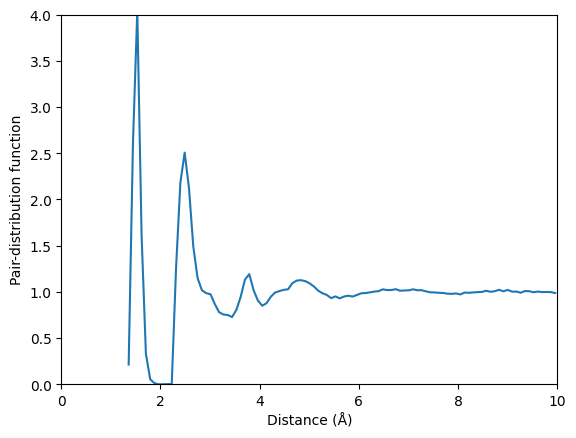

In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from ase.io import read
from matscipy.neighbours import neighbour_list

# Load a disordered configuration (amorphous carbon)
a = read('../../tests/aC.cfg')

# Get distance between atoms up to a distance of 5 Angstroms
d = neighbour_list('d', a, cutoff=10.0)

# Get distance distribution
n, x = np.histogram(d, bins=100, density=False)

# Plot the pair-distribution function
mean_distance = (x[1:] + x[:-1])/2
mean_density = len(a) / a.get_volume()
shell_volume = 4 * np.pi * (x[1:] ** 3 - x[:-1] ** 3) / 3
plt.plot(mean_distance, n / (shell_volume * len(a) * mean_density))
plt.xlabel('Distance (Å)')
plt.ylabel('Pair-distribution function')
plt.xlim(0, 10)
plt.ylim(0, 4)

## Fourier space

`matscipy` has utility function to compute pair-distribution (and other pair-correlation) functions. The utility function uses FFT to compute the long tail of the correlation function.

(0.0, 4.0)

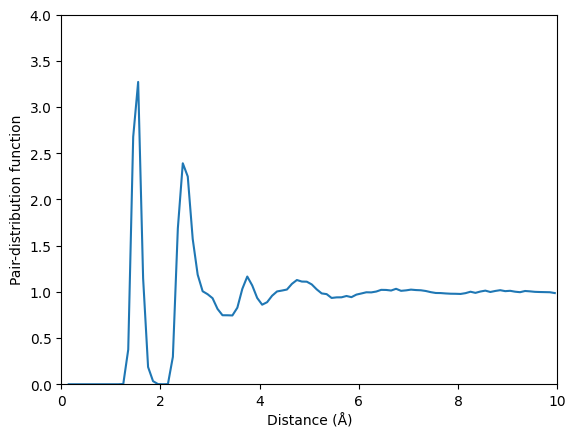

In [49]:
from matscipy.spatial_correlation_function import spatial_correlation_function

n, x = spatial_correlation_function(a, [1]*len(a), approx_FFT_gridsize=0.1)

plt.plot(x[x<10][1:], n[x<10][1:])
plt.xlabel('Distance (Å)')
plt.ylabel('Pair-distribution function')
plt.xlim(0, 10)
plt.ylim(0, 4)